# Victor Manuel Gómez Espinosa

In [102]:
#librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from microtc.textmodel import TextModel

# Datos

In [103]:
#leer datos
df=pd.read_csv('results.csv',index_col=0)
df.head(10)

,tweets,banks,sentiment,topics
0,"@BancoAzteca Buenas noches, acabo de salir de ...",azteca,NEU,productos
1,@BancoAzteca mi solicitud ya fue realizada la ...,azteca,NEU,productos
2,RT @LideresMexicano: Este 5 de octubre a las 2...,azteca,NEU,seguridad
3,RT @killer_queenbb: Mi día va genial \n@Facebo...,azteca,P,productos
4,Este 5 de octubre a las 20:30hrs lanzamos el p...,azteca,NEU,seguridad
5,Conoce los casos de éxito de nuestros oradores...,azteca,NEU,digital
6,RT @Efraincl83_MX: #Síguemeytesigo señor @Rica...,azteca,N,atn_cliente
7,#Síguemeytesigo señor @RicardoBSalinas que lam...,azteca,N,atn_cliente
8,"En nuestra mesa de discusión, hablamos sobre l...",azteca,NEU,seguridad
9,RT @MareaVerdeMex: ⚠️#ServicioSocialFeminista ...,azteca,NEU,seguridad


In [137]:
top=df.topics.unique()
top

array(['productos', 'seguridad', 'digital', 'atn_cliente', 'sucursal'],
      dtype=object)

# WordCloud

https://www.datacamp.com/community/tutorials/wordcloud-python

In [126]:
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopSpanish=set(stopwords.words('spanish'))

def remueveStop(texto):
    tm = TextModel()
    palabras=tm.tokenize(texto)
    temp=[]
    for pal in palabras:
        if pal not in stopSpanish:
            temp.append(pal)
            temp.append(" ")
    
    return "".join(temp)
#
def WordCloudImg(Corpus,name,maxword=5,l=[]):
    #procesando los documentos
    corpus_TextsPr=[]
    for fTr in Corpus:
        docProcTr= remueveStop(fTr)
        corpus_TextsPr.append(docProcTr)
    #junta todos los textos
    prep = " ".join(review for review in corpus_TextsPr)
    my_stopwords=set(STOPWORDS)
    my_stopwords.update(l)
    my_stopwords.update(['_neg','_usr','rt','_neu','htps','_neg_neg','htps_neg','_pos','co','s_num','_pos_neu','_neu_neu','_pos_pos','ma','banco','num','_num','teamsam','mas','tardes', 'si', 'ano','dia','hola','hoy','bva','quiero'])
    my_stopwords.update(stopSpanish)
    cloudtxt=WordCloud(background_color='white',stopwords=my_stopwords, max_words=maxword).generate(prep)
    plt.imshow(cloudtxt,interpolation='bilinear')
    plt.title('Área de oportunidad por segmento: '+name)
    plt.axis('off')
    plt.show()
    cloudtxt.to_file(name+".png")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seema\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


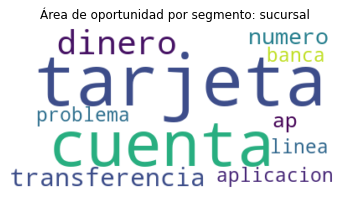

In [150]:
i=4
filtered=df[df.sentiment=='N']
filtered=filtered[filtered.banks=='bbva']
filtered=filtered[filtered.topics==top[0]]
#filtered=filtered[filtered.banks=='bbva']
filtered.shape
Corpus=filtered['tweets'].values #textos
WordCloudImg(Corpus,top[i],10,l=['puedo','hacer','pueden','levo','necesito','hace','hicieron','puede'])